# Principal component analysis 실습

# 1. 데이터 전처리 및 데이터 파악

In [1]:
from sklearn import datasets
from sklearn.decomposition import PCA

D:\Anaconda3\envs\opensource\lib\importlib\_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)


In [7]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

In [4]:
# iris 데이터
iris = datasets.load_iris()
dir(iris)

['DESCR', 'data', 'feature_names', 'filename', 'target', 'target_names']

In [5]:
X = iris.data[:, [0,2]]
y = iris.target

In [13]:
print(X.shape)
feature_names = [iris.feature_names[0], iris.feature_names[2]]
df_X = pd.DataFrame(X, columns = feature_names)
df_X.head()

(150, 2)


,sepal length (cm),petal length (cm)
0,5.1,1.4
1,4.9,1.4
2,4.7,1.3
3,4.6,1.5
4,5.0,1.4


In [15]:
print(y.shape)
df_Y = pd.DataFrame(y, columns = ['species'])
df_Y.head()

(150,)


,species
0,0
1,0
2,0
3,0
4,0


In [16]:
# 결측치 여부 파악
print(df_X.isnull().sum())
print(df_Y.isnull().sum())

sepal length (cm)    0
petal length (cm)    0
dtype: int64
species    0
dtype: int64


In [18]:
# 범주형 값 확인
print(set(y))
print(iris.target_names)

{0, 1, 2}
['setosa' 'versicolor' 'virginica']


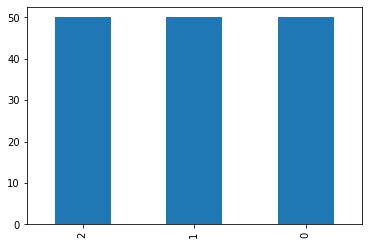

In [22]:
# 종속 변수의 분포를 살핌
df_Y['species'].value_counts().plot(kind='bar')
plt.show()

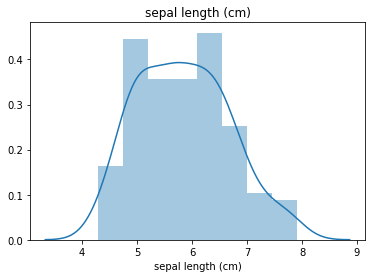

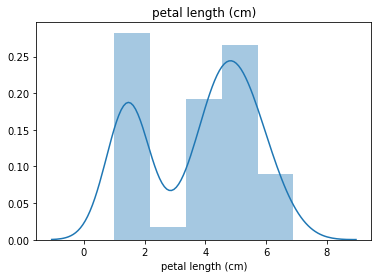

In [24]:
# 독립 변수의 분포를 살핌
for idx in range(len(feature_names)):
    sns.distplot(df_X[feature_names[idx]])
    plt.title(feature_names[idx])
    plt.show()

# 2. PCA 함수 활용 및 아웃풋 의미 파악

In [26]:
# PCA 함수를 활용하여 PC를 얻어냄. 아래의 경우 PC 2개를 뽑아냄
pca = PCA(n_components = 2)
pca.fit(X)

PCA(copy=True, iterated_power='auto', n_components=2, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

In [27]:
# 아래와 같이 PC score를 얻어냄. 아래의 PC score를 이용하여 회귀분석에 활용
PCscore = pca.transform(X)
print(PCscore.shape)
PCscore[0:5]

(150, 2)


array([[-2.46024094, -0.24479165],
       [-2.53896211, -0.06093579],
       [-2.70961121,  0.08355948],
       [-2.56511594,  0.25420858],
       [-2.49960153, -0.15286372]])

In [28]:
# 실제로 PCscore = XV 가 성립하는지 확인
eigens_v = pca.components_.transpose()
# print(eigens_v)

[[ 0.39360585 -0.9192793 ]
 [ 0.9192793   0.39360585]]


In [30]:
# 자료 X를 centering 하는 과정이 선행되어야 한다.
mX = np.matrix(X)
for i in range(X.shape[1]):
    mX[:,i] = mX[:,i] - np.mean(mX[:,i])
dfmX = pd.DataFrame(mX)

In [31]:
(mX * eigens_v)[0:5]

matrix([[-2.46024094, -0.24479165],
        [-2.53896211, -0.06093579],
        [-2.70961121,  0.08355948],
        [-2.56511594,  0.25420858],
        [-2.49960153, -0.15286372]])

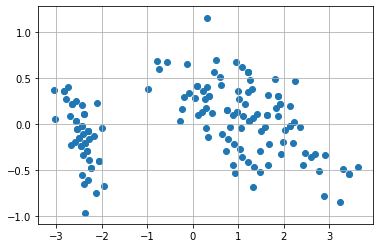

In [33]:
# PC score의 plot 확인
plt.scatter(PCscore[:, 0], PCscore[:, 1])
plt.grid(True)
plt.show()

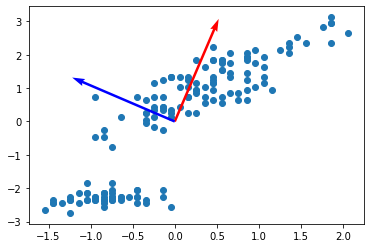

In [34]:
# original data 분포
plt.scatter(dfmX[0], dfmX[1])
origin = [0], [0]    # origin point
plt.quiver(*origin, eigens_v[0,:], eigens_v[1,:], color = ['r', 'b'], scale = 3)
plt.show()

# 3. PC를 활용한 회귀분석

In [35]:
# 모든 독립 변수를 활용하여, PC를 뽑아냄
X2 = iris.data
pca2 = PCA(n_components = 4)
pca2.fit(X2)

PCA(copy=True, iterated_power='auto', n_components=4, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

In [36]:
# eigen value
pca2.explained_variance_

array([4.22824171, 0.24267075, 0.0782095 , 0.02383509])

In [37]:
# 위 셀의 결과를 참고하여, 상위 2개의 eigen value(or 데이터의 분산을 잘 설명하는 상위 2개 축)에 대응하는 PC score를 추출 
# i번째 관측치를 두 개의 직교 벡터에 정사영을 실시한 좌표 값
PCs = pca2.transform(X2)[:, 0:2]

In [38]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix

In [39]:
# 모델의 복잡성으로 인하여, 기존 자료를 이용하여 로지스틱 회귀 계수를 추정할 수 없는 경우
clf = LogisticRegression(solver="sag", multi_class="multinomial").fit(X2, y)

D:\Anaconda3\envs\opensource\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


In [40]:
# PC 2개 만을 뽑아내어 분석한 경우, 모델을 추정할 수 있음
clf2 = LogisticRegression(solver="sag", multi_class="multinomial").fit(PCs, y)

In [41]:
clf2.predict(PCs)

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [42]:
# confusion matrix를 통해 예측 정확도를 판단
confusion_matrix(y, clf2.predict(PCs))

array([[50,  0,  0],
       [ 0, 47,  3],
       [ 0,  2, 48]], dtype=int64)